In [27]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [7]:
counter = 0;
for root, dirs, files in os.walk("./swissimage_annotator/static/data/swimmingpooldetector/y", topdown=False):
    for file in files:
        print(os.path.join(root, file))

./swissimage_annotator/static/data/swimmingpooldetector/y\2686000_1241800.png
./swissimage_annotator/static/data/swimmingpooldetector/y\2686000_1241900.png
./swissimage_annotator/static/data/swimmingpooldetector/y\2686000_1241950.png
./swissimage_annotator/static/data/swimmingpooldetector/y\2686050_1241700.png
./swissimage_annotator/static/data/swimmingpooldetector/y\2686050_1241850.png
./swissimage_annotator/static/data/swimmingpooldetector/y\2686050_1241950.png
./swissimage_annotator/static/data/swimmingpooldetector/y\2686100_1241250.png
./swissimage_annotator/static/data/swimmingpooldetector/y\2686100_1241750.png
./swissimage_annotator/static/data/swimmingpooldetector/y\2686150_1241250.png
./swissimage_annotator/static/data/swimmingpooldetector/y\2686150_1241600.png
./swissimage_annotator/static/data/swimmingpooldetector/y\2686150_1241850.png
./swissimage_annotator/static/data/swimmingpooldetector/y\2686150_1241900.png
./swissimage_annotator/static/data/swimmingpooldetector/y\268620

In [18]:
def getPathToPositivePicture():
    for root, dirs, files in os.walk("./swissimage_annotator/static/data/swimmingpooldetector/y", topdown=False):
        for file in files:
            yield os.path.join(root, file)

def getPathToNegativePicture():
    for root, dirs, files in os.walk("./swissimage_annotator/static/data/swimmingpooldetector/n", topdown=False):
        for file in files:
            yield os.path.join(root, file)

In [19]:
positiveGenerator = getPathToPositivePicture()
negativeGenerator = getPathToNegativePicture()

In [22]:
print(negativeGenerator.__next__())

./swissimage_annotator/static/data/swimmingpooldetector/n\2686000_1240100.png


In [30]:
def loadAndPreparePictureFromPath(path: os.path):
    image = cv2.imread(path)
    return np.asarray(image)

In [33]:
picture = loadAndPreparePictureFromPath(negativeGenerator.__next__())

In [71]:
def getPicture(generator):
    picture = loadAndPreparePictureFromPath(generator.__next__())
    picture = picture / 255
    return picture

In [72]:
def generateEqualDataSet(numberOfDataPoints: int):
    positiveGenerator = getPathToPositivePicture()
    negativeGenerator = getPathToNegativePicture()
    dataSet = []
    for _ in range(numberOfDataPoints + 1):
        dataSet.append((getPicture(positiveGenerator), 1))
        dataSet.append((getPicture(negativeGenerator), 0))
    np.random.shuffle(dataSet)
    return dataSet

In [73]:
dataSet = generateEqualDataSet(4)

0


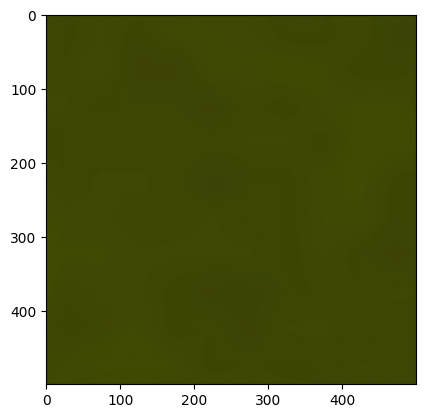

In [74]:
print(dataSet[3][1])
plt.imshow(dataSet[3][0])

In [83]:
print(max(dataSet[1][0]))

TypeError: 'numpy.bool_' object is not iterable

In [86]:
import dataGenerator

In [87]:
data = dataGenerator.generateEqualDataSet(10)

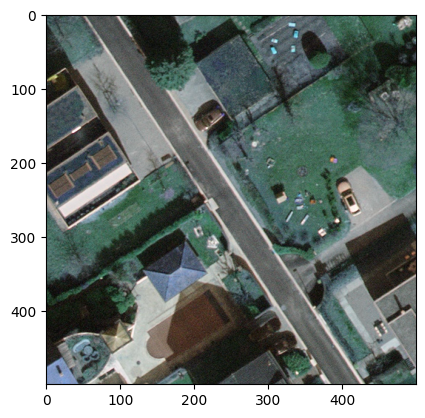

In [88]:
plt.imshow(data[1][0])